# Compare the algorithm of Girvan & Newman, and Newman's fast algorithm for community detection in graphs

---

## The algorithms


---

### Girvan-Newman:

Originally described in 2003 [1](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC122977/) the algorithm of Girwvan and Newman (GN) is based on the idea that all the  shortest paths connecting two clusters run through the few edges connecting the communities. Therefore after removing the edges which are part of the most shorts paths, the graph could fall apart into the desired disonnected components: the communities.

The algorithm is originally desribed as follows:

> 1. Calculate the betweenness for all edges in the network.
> 2. Remove the edge with the highest betweenness.
> 3. Recalculate betweennesses for all edges affected by the removal.
> 4. Repeat from step 2 until no edges remain.

The GN algorithm results in a dendrogram, which is a hierarchical clustering, but it does not select a level of the dendrogram. To obtain an optimal clustering usually the levels of the dendrogram are evaluated with a score, and the best one is selected. A popular score is the modularity of a partition of the graph which is defined as the folowing:

> Let $e_{ij}$ be the fraction of edges in the network that conn􏰀ect vertices in group $i$ to those in group $j$, and let $a_i = \sum_j e_{ij}$ Then

> $Q = \sum_i e_{ii} - a_i^2 $

> is the fraction of edges that fall within communities, minus the expected value of the same quantity if edges fall at random without regard for the community structure.

The GN algorithm is not very fast, it scales with $ O(m^2 n) $ for general graphs, and $O(n^3)$ for the frequently analyzed sparse graphs. The bad scaling make this method practically inapplicable for graph larger than some thousand nodes.

---

### Newman's fast algorithm

Descirbed in [2](http://arxiv.org/pdf/cond-mat/0309508v1.pdf) Newman's fast algorithm (NF) tries to directly optimize the modularity score. Starting from each node as a distinct cluster it merges cluster in each step. The merged clusters are selected to optimize the gain in modularity in the step, therefore it is a greedy optimaztion algorithm of the modularity score. 


The most important feature of the NF is that it is much faster, and scales better than GN,  $ O((m+n) n) $ for general graphs, and $O(n^2)$ for sparse graphs. 




--- 

## Test the algorithms on Girvan-Newman synthetic bechmark graphs

### The graphs:

To test the efficiency of a community detection algorithm simulated graphs with ground truth communities can be used in a relatively straigh way (compared to real world graphs, where the "real" communities are not known). Girvan and Newman proposed such a synthetic benchmark network.

> Each graph was constructed with 128 vertices divided into four communities of 32 vertices each. Edges were placed between vertex pairs independently at random, with probability Pin for vertices belonging to the same community and Pout for vertices in different communities, with Pout < Pin. The probabilities were chosen so as to keep the average degree z of a vertex equal to 16. This produces graphs that have known community structure, but which are essentially random in other respects. 


To test the result of a community detection algorithm they introduced the score called "fraction of vertices classified correclty" (FVCC) :

>We find the largest set of vertices that are grouped together by the algorithm in each of the four known communities. If the algorithm puts two or more of these sets in the same group, then all vertices in those sets are considered incorrectly classi- fied. Otherwise, they are considered correctly classified. All other vertices not in the largest sets are considered incorrectly classified.

( Please note that the decription of the FVCC score can not be found in the arxiv version of the article, only in the [published ones](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.69.066133) ).



- I have to run it 2 times why??

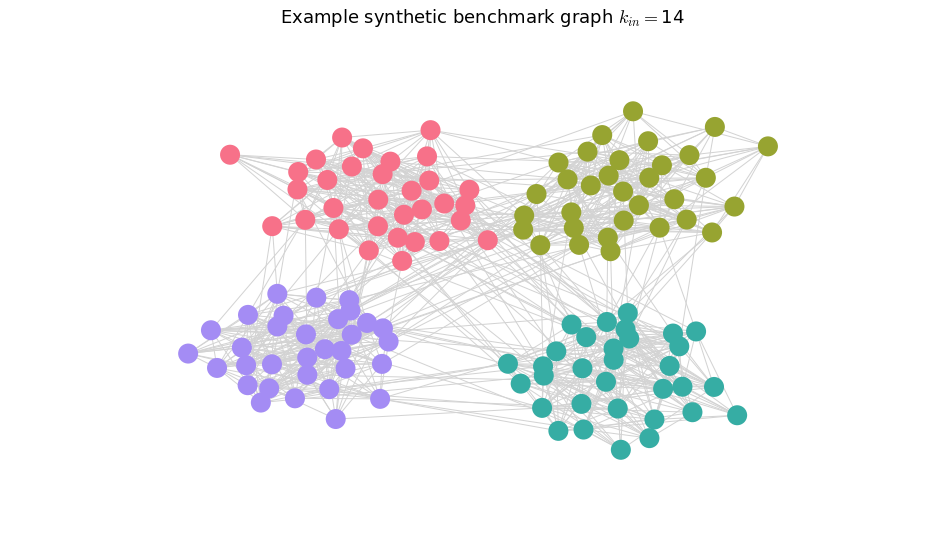

In [3]:
import sys
sys.path.append('my_modules/')
%matplotlib inline
from girwan_newman_benchmark import plot_example_graph
plot_example_graph(k_in=14)


### The test:
---

By changing the number of edges connecting communities in the graphs, we can create easier, and harder excercises for the algorithms. When nodes have more than 12 edges running inside the communty, and only 2-3 edges connecting them to other clusters, the structure can be decoded easily by the algorithms. With higher number of edges connecting components, is becomes harder and harder to detect the original clusters. With around 12 edges going out of the original communities, the distinction between original communities disappear, and with even more edges between original groups, the pre-defined clusters turn into some kind of anti-communities, making it impossible to recover the structure.


To test the effiecency of algorithms depending of the difficulty of the test graph, they were applied to graph ranging from simple ones with 0 edges connecting original components, to impossible ones with 12 edges between components. The results are plotted below.

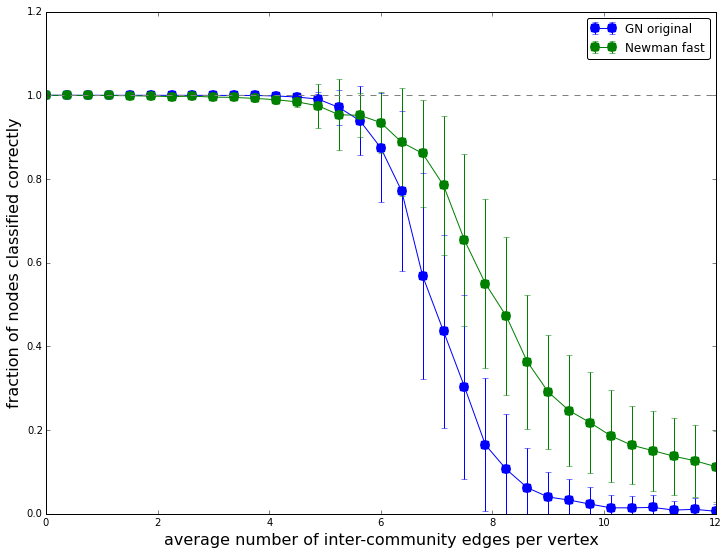

In [3]:
import igraph 
from igraph_method_wrappers import scan_k_in_vals
import numpy as np
import matplotlib.pyplot as plt

N=33 # number of k_in values
M=10 # repetition number

#the methods
GN=igraph.Graph.community_edge_betweenness
N_fast=igraph.Graph.community_fastgreedy

#run test
GN_res,krange=scan_k_in_vals(GN,N=N,M=M)
N_fast_res,krange=scan_k_in_vals(N_fast,N=N,M=M)

#plot the result
fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.errorbar(16-krange,np.mean(GN_res,axis=1),np.std(GN_res,axis=1),
            marker='o',c='blue',ms=10,mec='none',label='GN original')
ax.errorbar(16-krange,np.mean(N_fast_res,axis=1),np.std(N_fast_res,axis=1),
            marker='o',c='green',ms=10,mec='none',label='Newman fast')
ax.axhline(1,linestyle='dashed',color='grey')
ax.set_ylim(0,1.2)
ax.legend(loc='best',fancybox=True)
ax.set_xlabel('average number of inter-community edges per vertex',fontsize=16)
dump=ax.set_ylabel('fraction of nodes classified correctly',fontsize=16)
fig.savefig('gn_nfast_comp_12_30.png')




## Real world networks
---

To compare the results of the two algorithms, I have applied them to a real world graph downloaded from [Stanford Large Network Dataset](https://snap.stanford.edu/data/). 

The GN algorithm is so slow that i had to select a relatively small network (~4k nodes, 80k edges ), and it was still running for almost a day. The analyzed [graph](https://snap.stanford.edu/data/egonets-Facebook.html) is a very small subset of the facebook friend network.

---

## Tools, sofware used
----

#### Python networkx library

I used this very user friendly graph api for creating the GN synthetic benchmark graphs. I have also implemented the GN algorithm using networkx, but it turned out to be so slow that I have started to look for a faster solution.

#### Igraph library

Igraph offers graph algorithms implemented in C with optimized data structures, and is therefore [orders of magnitude faster](https://graph-tool.skewed.de/performance) than the pure python NetworkX library. Igraph also offers built-in optimized implementations of both algorithms. 


#### Jupyter notebooks

Most of the work were done in jupyter notebooks, and all the notebook, and code can be found in a [github repository](https://github.com/riblidezso/gw_graph_clust)  created for the project.

### Bibliography


---

In [1]:
#Toggle code

from IPython.display  import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')